In [1]:
import altair as alt
import pandas as pd
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
dados = pd.read_csv('dadosSP1.csv', sep = ',')
dados.head()

,Unnamed: 0,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Q027
0,0,Araraquara,29.0,F,1,1,11,1,0,NaN,445.4,589.0,621.5,465.5,560.0,D,A
1,21,Diadema,19.0,F,1,1,2,1,0,NaN,402.9,447.6,537.3,425.5,640.0,B,A
2,25,Santa Fé do Sul,24.0,M,1,1,7,1,0,NaN,706.5,709.9,625.1,769.1,620.0,I,D
3,32,São Paulo,28.0,F,2,1,11,1,0,NaN,631.1,609.7,596.1,535.5,720.0,J,A
4,45,São Paulo,18.0,F,1,1,1,1,0,NaN,685.2,719.2,619.4,799.6,800.0,H,D


In [3]:
dados.drop('Unnamed: 0', axis =1, inplace = True)

In [4]:
dados1 = dados.sample(5000)

In [5]:
dados1 = dados.groupby(by = 'NO_MUNICIPIO_RESIDENCIA').mean()

In [6]:
dados1['NU_NOTA_MED'] = (dados1.NU_NOTA_CH + dados1.NU_NOTA_CN + dados1.NU_NOTA_LC + dados1.NU_NOTA_MT + dados1.NU_NOTA_REDACAO)/5

In [7]:
dados1 = dados1.reset_index()

In [8]:
dados1.to_csv('dados_to_matplot.csv')

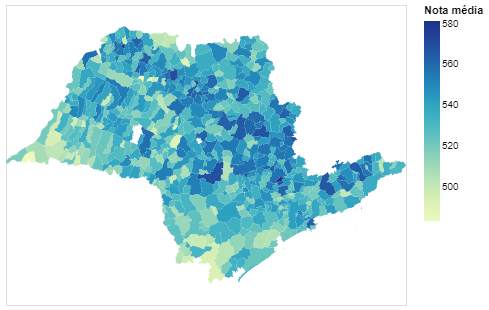

In [10]:
sp = alt.topo_feature('https://raw.githubusercontent.com/GiovaniValdrighi/DataScience_IC/master/topojson-sp2.json','geojs-35-mun')
alt.Chart(sp).mark_geoshape().encode(
    color=alt.Color('NU_NOTA_MED:Q', title = 'Nota média'),
    tooltip = [alt.Tooltip('properties.name:N', title = 'Cidade'), alt.Tooltip('NU_NOTA_MED:N', title = 'Nota média')]
).transform_lookup(
    lookup = 'properties.name',
    from_= alt.LookupData('https://raw.githubusercontent.com/GiovaniValdrighi/DataScience_IC/master/dados_to_matplot.csv', 'NO_MUNICIPIO_RESIDENCIA',['NU_NOTA_MED'])
)